In [1]:
# importing libraries.!!

import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.style.use('ggplot')

In [2]:
# loading data

data = pd.read_csv('heart-disease-uci/heart.csv')

In [3]:
# Let's take a look into the data

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(f'Data have {data.shape[0]} rows and {data.shape[1]} columns')

Data have 303 rows and 14 columns


In [5]:
# distribution of the features in the dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


1.  Categorical Variables

Dataset contains some categorical variables like 
* sex
* cp
* fbs
* restecg
* exang
* slope
* ca
* thal

and finally our target

Let's do some EDA on these features first

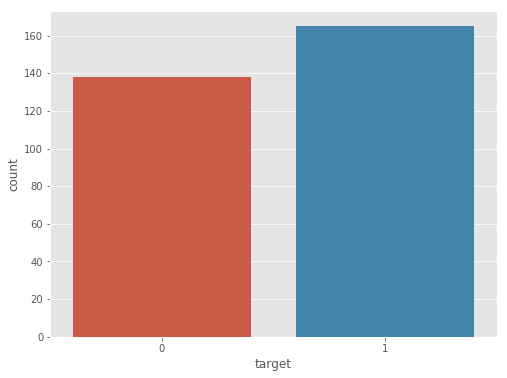

In [6]:
# check the target distribution

plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x='target', data=data);

Let's see how much males and females are there in the dataset who have a heart problem

In [7]:
data.groupby(by=['sex', 'target'])['target'].count()

sex  target
0    0          24
     1          72
1    0         114
     1          93
Name: target, dtype: int64

In [8]:
pd.crosstab(data['sex'], data['target'])

target,0,1
sex,,
0,24,72
1,114,93


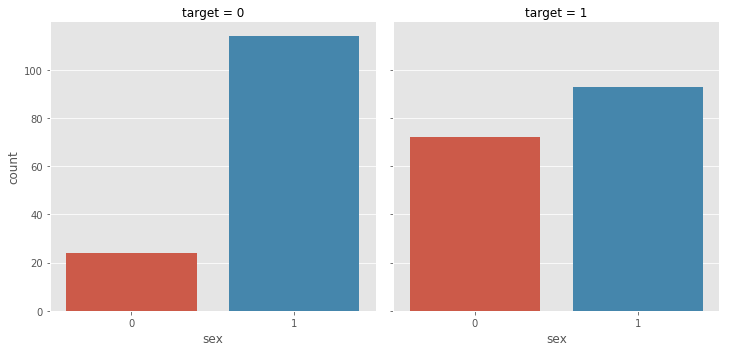

In [9]:
sns.catplot(x='sex', col='target', kind='count', data=data);

In [10]:
print("% of women suffering from heart disease: " , data.loc[data.sex == 0].target.sum()/data.loc[data.sex == 0].target.count())
print("% of men suffering from heart disease:   " , data.loc[data.sex == 1].target.sum()/data.loc[data.sex == 1].target.count())

% of women suffering from heart disease:  0.75
% of men suffering from heart disease:    0.4492753623188406


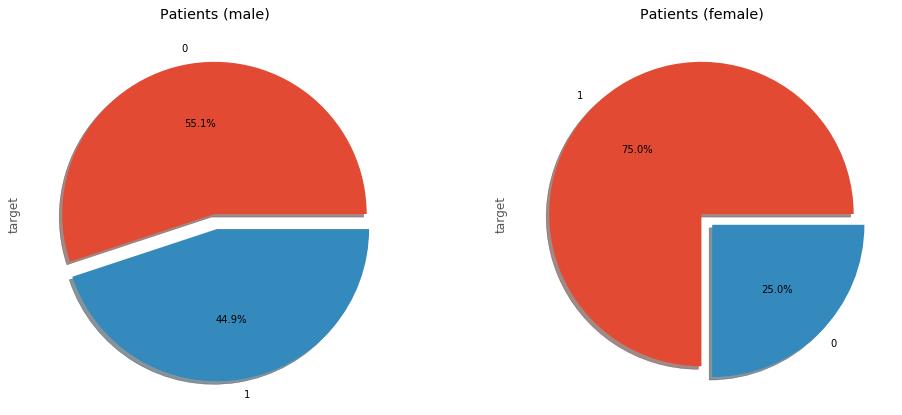

In [11]:
f,ax=plt.subplots(1,2,figsize=(16,7))

data.loc[data['sex']==1, 'target'].value_counts().plot.pie(explode=[0,0.10],autopct='%1.1f%%',ax=ax[0],shadow=True)
data.loc[data['sex']==0, 'target'].value_counts().plot.pie(explode=[0,0.10],autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('Patients (male)')
ax[1].set_title('Patients (female)')

plt.show()

Percentage of Females is more in this dataset who have a heart disease.

Let's check cp feature - chest pain type

In [12]:
data.groupby(by=['cp', 'target'])['target'].count()

cp  target
0   0         104
    1          39
1   0           9
    1          41
2   0          18
    1          69
3   0           7
    1          16
Name: target, dtype: int64

In [14]:
pd.crosstab(data['cp'], data['target']).style.background_gradient(cmap='autumn_r')

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


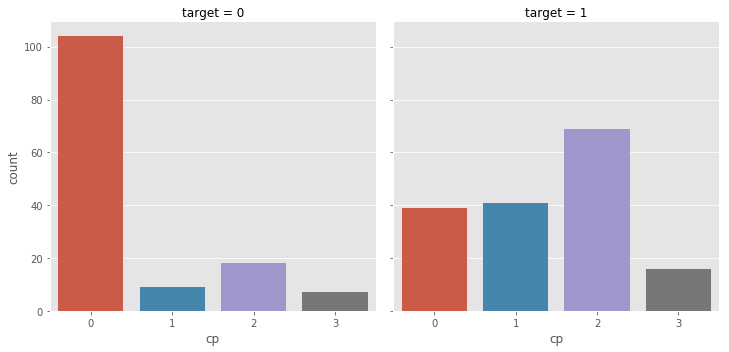

In [15]:
sns.catplot(x='cp', col='target', kind='count', data=data);

Patients who had chest pain type 2 is more in the category of people with disease. Also, chest pain type 0 is not that serious as there are many people (~110) who had chest pain type 0 without heart disease.

Let's see the fbs feature now, **fasting blood sugar > 120 mg/dl (1 = true; 0 = false)**

In [16]:
data.groupby(by=['fbs', 'target'])['target'].count()

fbs  target
0    0         116
     1         142
1    0          22
     1          23
Name: target, dtype: int64

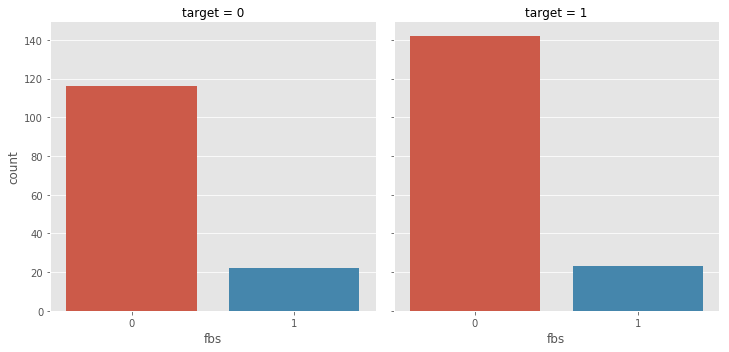

In [17]:
sns.catplot(x='fbs', col='target', kind='count', data=data);

Number of people if blood sugar is almost similar in both categories. fbs won't be a good indicator always for determining heart disease from this dataset.

Let's now see restecg feature 

**resting electrocardiographic results <br>
-- Value 0: normal <br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria **

In [18]:
data.groupby(by=['restecg', 'target'])['target'].count()

restecg  target
0        0         79
         1         68
1        0         56
         1         96
2        0          3
         1          1
Name: target, dtype: int64

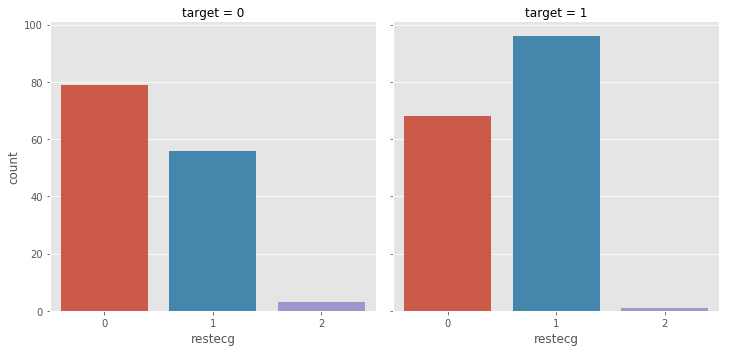

In [19]:
sns.catplot(x='restecg', col='target', kind='count', data=data);

The number of people having ST-T wave abnormality is more in the category with hart diesase. 

Let's check the exang feature 

**exercise induced angina (1 = yes; 0 = no) **

In [20]:
data.groupby(by=['exang', 'target'])['target'].count()

exang  target
0      0          62
       1         142
1      0          76
       1          23
Name: target, dtype: int64

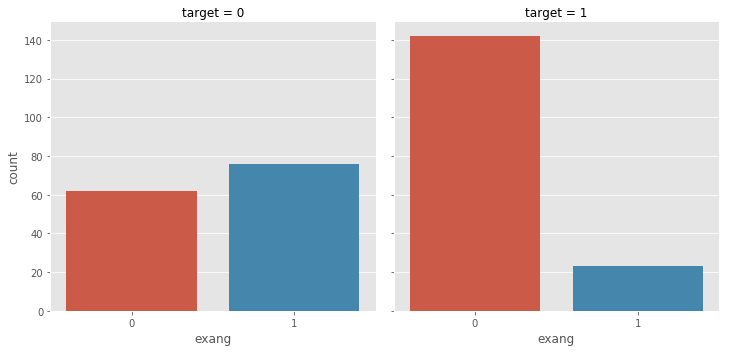

In [21]:
sns.catplot(x='exang', col='target', kind='count', data=data);

People without **exercise induced angina** is more in the category with disease.

Let's see what info does slope feature have to give.

**slope: the slope of the peak exercise ST segment <br>
-- Value 1: upsloping <br>
-- Value 2: flat <br>
-- Value 3: downsloping **

In [22]:
data.groupby(by=['slope', 'target'])['target'].count()

slope  target
0      0          12
       1           9
1      0          91
       1          49
2      0          35
       1         107
Name: target, dtype: int64

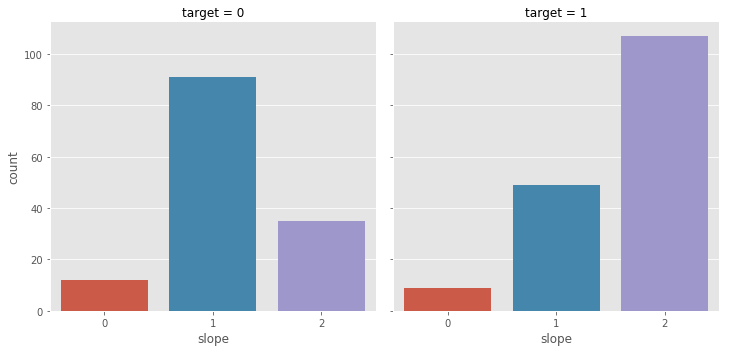

In [23]:
sns.catplot(x='slope', col='target', kind='count', data=data);

Numer of people with **downsloping** is more (~105) in the category with diesease. Hmm, that is worth noting.

Let's check the feature **ca** now.

**ca: number of major vessels (0-3) colored by flourosopy **

In [24]:
data.groupby(by=['ca', 'target'])['target'].count()

ca  target
0   0          45
    1         130
1   0          44
    1          21
2   0          31
    1           7
3   0          17
    1           3
4   0           1
    1           4
Name: target, dtype: int64

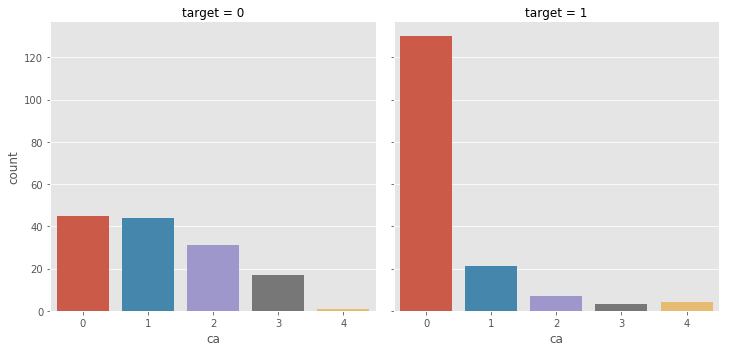

In [25]:
sns.catplot(x='ca', col='target', kind='count', data=data);

Most of the people with heart disease have **ca** as **0**. 

Let's see what story is feature **thal** telling.

**thal: 3 = normal; 6 = fixed defect; 7 = reversable defect **

In [26]:
data.groupby(by=['thal', 'target'])['target'].count()

thal  target
0     0           1
      1           1
1     0          12
      1           6
2     0          36
      1         130
3     0          89
      1          28
Name: target, dtype: int64

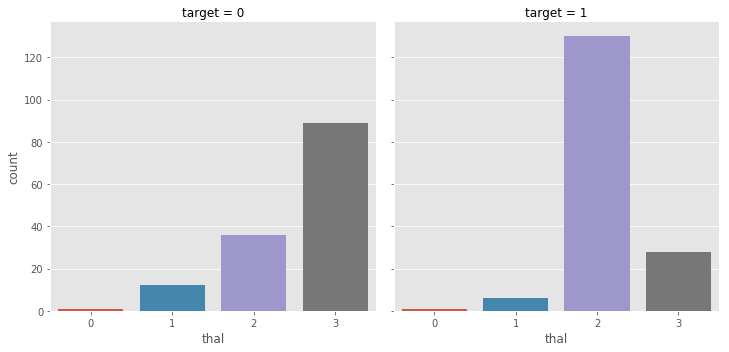

In [27]:
sns.catplot(x='thal', col='target', kind='count', data=data);

Most of the people with heart disease have **thal** as **2**.  Interesting.


2. Continous Features

Let's now explore the continous features.
* age
* trestbps
* thalach
* oldpeak

Let's see how age is distributed in our dataset and how is the distribution among the people with and without disease.

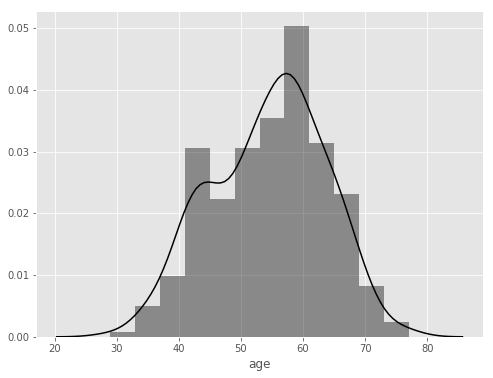

In [28]:
sns.distplot(a=data['age'], color='black');

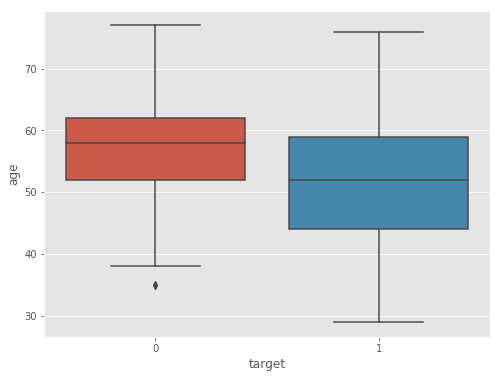

In [29]:
sns.boxplot(x=data['target'], y=data['age']);

Median age of people with disease is less than that of without disease. Age itself can't be a descriptor to predict disease. 

Let's see how trestbps is distributed

**trestbps: resting blood pressure (in mm Hg on admission to the hospital) **

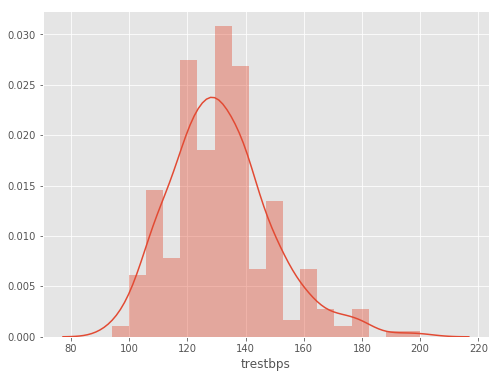

In [30]:
sns.distplot(data['trestbps']);

We can see some outliers from the histogram, let's check in which category do those outliers belong.

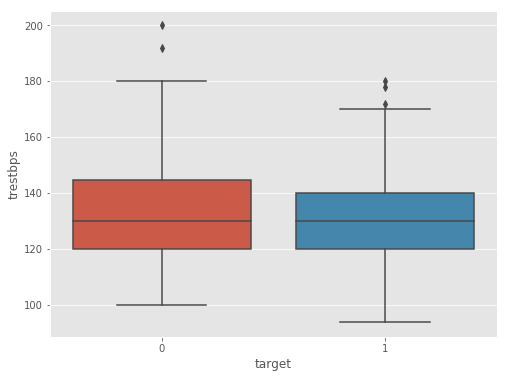

In [31]:
sns.boxplot(x=data['target'], y=data['trestbps']);

Outliers that are around 200 are in catgory without disease. We can also see the median **testbps** is almost equal is both cases.

Let's check **thalach** feature. 

**thalach: maximum heart rate achieved**

I personally think heart rate will be a good indicator for a heart disease. Let's check what our data have to tell.

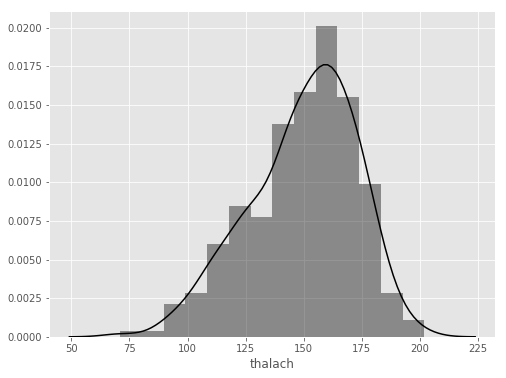

In [32]:
sns.distplot(data['thalach'], color='black');

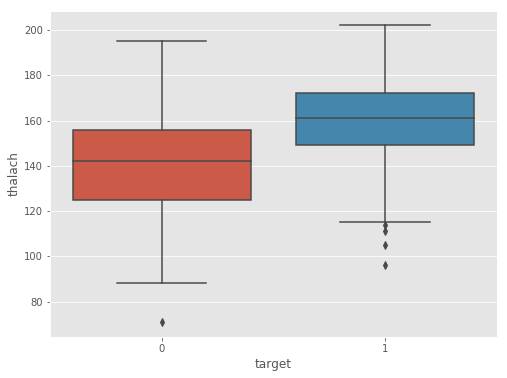

In [33]:
sns.boxplot(x=data['target'], y=data['thalach']);

Yeah, my guess was correct. People with higher heart rate is tend to have hear disease. Also there are outliers who have heart rate around 190 but don't have heart disease. 
But overall, the median heart rate is more for the people with heart disease.

Let's see **chol** feature.

** chol: serum cholestoral in mg/dl **

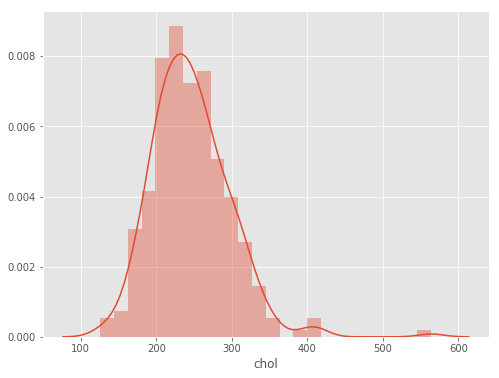

In [34]:
sns.distplot(data['chol']);

Woah, an outlier with ~550 mg/dl chol. I guess it will fall under the category of people with disease.

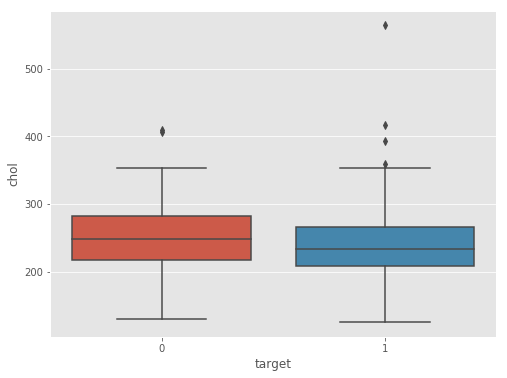

In [35]:
sns.boxplot(x='target', y='chol', data=data);

Eventhough the median **chol** is more for **target** 0 we can see very high values of **chol** in **target** 1. Outliers seems a good indicator.

**3. Relationship among continous variables**

Let's see how **thalach** and **col** are related.

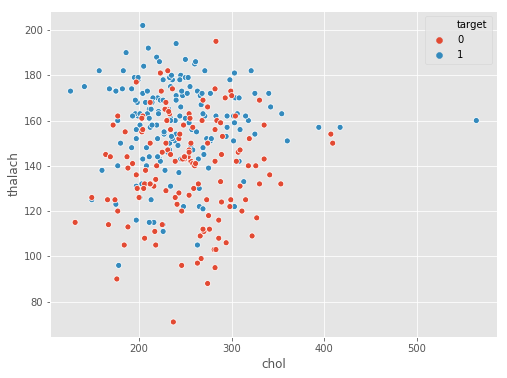

In [36]:
sns.scatterplot(x='chol', y='thalach', data=data, hue='target');

**chol** v/s **age**

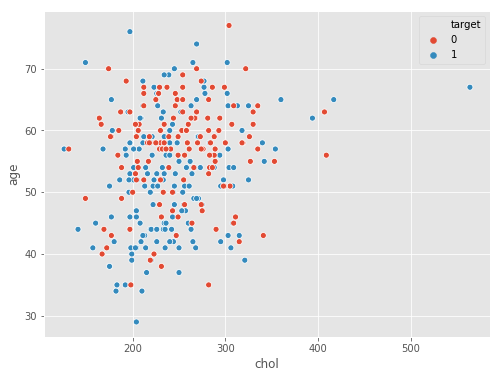

In [37]:
sns.scatterplot(x='chol', y='age', data=data, hue='target');

**chol** v/s **testbps**

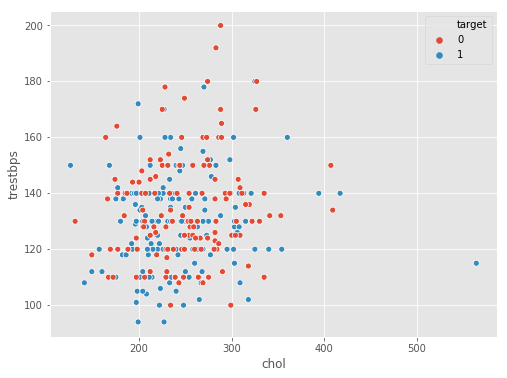

In [38]:
sns.scatterplot(x='chol', y='trestbps', data=data, hue='target');

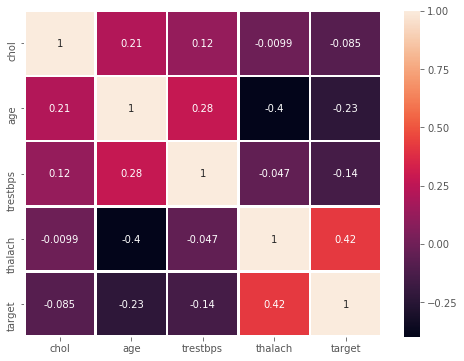

In [45]:
corr = data[['chol', 'age', 'trestbps', 'thalach', 'target']].corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, linewidths=1.7, linecolor='white');

As expected, there is no notable correlation among these features.